In [33]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from gensim import similarities
import numpy as np
import pandas as pd
import pickle

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7  # plotsize
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['font.size'] = 14

In [2]:
path = '/home/hxzheng/Insight_DS_Fellowship/Project/JobRecomm/Resume_text/'

In [10]:
index = similarities.MatrixSimilarity.load(path + 'final_lsimodel.index')
jobs=pd.read_pickle(path + "jobs_table.dat") 

In [12]:
jobid = jobs['jobid']

In [14]:
jobid.head()

0    0
1    0
2    0
3    0
4    0
Name: jobid, dtype: int64

In [4]:
model_array = index.index

In [5]:
reduced_data = PCA(n_components=2).fit_transform(model_array)

In [6]:
reduced_data.shape

(2816, 2)

In [16]:
ind = (jobid.loc[jobid==0]).index
print ind

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            681, 682, 683, 684, 685, 686, 687, 688, 689, 690],
           dtype='int64', length=691)


In [17]:
jobid.unique()

array([0, 1, 2, 3])

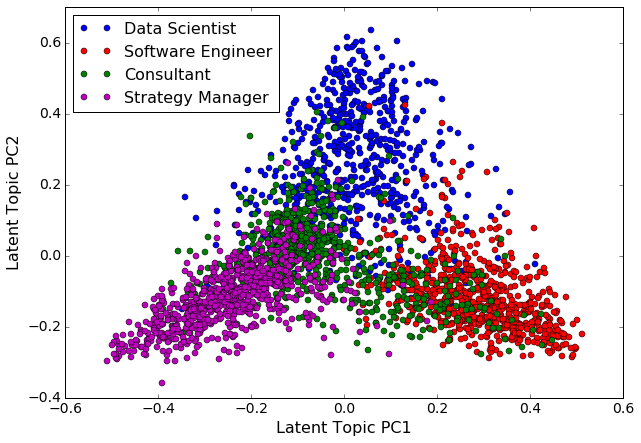

In [34]:
colors=['b','r','g','m']
jobclass=['Data Scientist', 'Software Engineer', 'Consultant', 'Strategy Manager']
plt.figure()
for i in range(len(jobid.unique())):
    ind = (jobid.loc[jobid==i]).index
    plt.plot(reduced_data[ind,0],reduced_data[ind,1],'o',alpha=1.0, color=colors[i],label=jobclass[i])

plt.xlabel('Latent Topic PC1',fontsize=16)
plt.ylabel('Latent Topic PC2',fontsize=16)
plt.ylim(-0.4,0.7)
plt.legend(loc='upper left',fontsize=16)    
plt.savefig(path + 'PCA_Clusters.png', bbox_inches='tight')

In [7]:
k = 4
km = KMeans(n_clusters=k).fit(reduced_data)
labels = km.labels_
centroids = km.cluster_centers_

In [8]:
centroids

array([[-0.08237617,  0.02685447],
       [ 0.03852649,  0.33330627],
       [ 0.27545596, -0.121809  ],
       [-0.29005294, -0.14347464]])

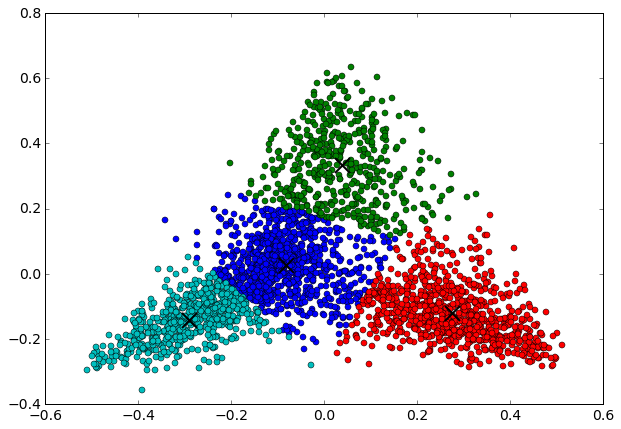

In [36]:
## Visualization

for i in range(k):
    # select only data observations with current label
    ds = reduced_data[np.where(labels==i)]
    
    # plot data
    plt.plot(ds[:,0], ds[:,1], 'o')
    
    # plot centroids
    lines = plt.plot(centroids[i,0], centroids[i,1], 'kx')
    
    # make centroid Xs bigger
    plt.setp(lines, ms=15.0)
    plt.setp(lines, mew=2.0)

In [35]:
metrics.silhouette_score(reduced_data, km.labels_, metric='euclidean', sample_size=model_array.shape[0])

0.47400996